#Import Data from Kaggle


In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "devangshrivastava"
os.environ['KAGGLE_KEY'] = "6ed8de5e4a5760b25676a41aada5931e"
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.decomposition import PCA
import cv2
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
!kaggle datasets download tawsifurrahman/covid19-radiography-database

100% 776M/778M [00:40<00:00, 20.6MB/s]
100% 778M/778M [00:41<00:00, 19.9MB/s]


In [ ]:
!unzip covid19-radiography-database.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7921.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7922.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7932.png  
 

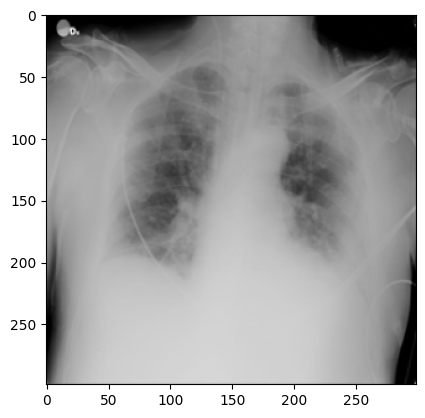

In [ ]:
img = cv2.imread('COVID-19_Radiography_Dataset/COVID/images/COVID-1.png')
plt.imshow(img)

#Transforming Images with masked dataset 

In [ ]:
covid_path = 'COVID-19_Radiography_Dataset/COVID'
CovidUrl_img = os.listdir('COVID-19_Radiography_Dataset/COVID/images')
CovidUrl_msk = os.listdir('COVID-19_Radiography_Dataset/COVID/masks')
l=['COVID','Lung_Opacity','Normal','Viral Pneumonia']

def loadImages(l):
  images = []
  labels = []
  for j in range(4):
    path = 'COVID-19_Radiography_Dataset/' + l[j]
    urls_img = os.listdir(path + '/images')
    urls_msk = os.listdir(path + '/masks')
    print(j)
    for i in range(int(len(urls_img)*0.7)): 
      img = cv2.imread(path + '/images/' + urls_img[i])
      mask = cv2.imread(path + '/masks/' + urls_img[i])
      img = cv2.resize(img, (mask.shape[1], mask.shape[0]))
      masked = cv2.bitwise_and(img, mask)
      masked = cv2.cvtColor(masked, cv2.COLOR_BGR2GRAY)
      masked_flat = masked.flatten()
      masked = cv2.resize(masked, (70, 70))/255.0
      images.append(masked_flat)
      # cv2.imwrite("masked_data/"+urls_img[i], masked)
      masked = None
      img = None
      labels.append(j)
  return images,labels


covid_img, covid_label = loadImages(l)
covid_img = np.asarray(covid_img)
df_data = pd.DataFrame(covid_img)
covid_img = None

0
1
2
3


In [ ]:
df_data

,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14809,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14811,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14812,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pca = PCA(n_components=50) 
df_data = pca.fit_transform(df_data)

In [ ]:
var_exp = pca.explained_variance_ratio_


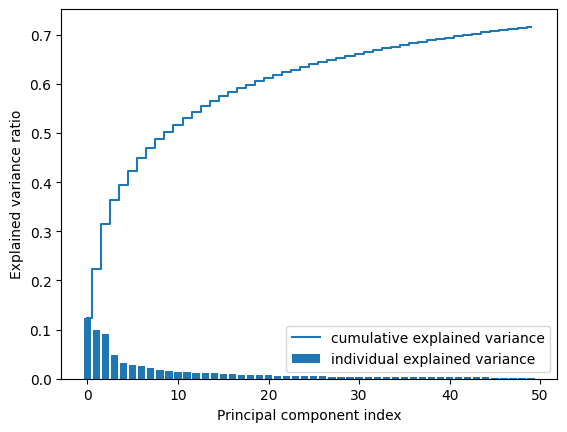

In [ ]:
cum_var_exp = np.cumsum(var_exp)
plt.bar(np.arange(len(var_exp)), var_exp,align='center', label='individual explained variance')
plt.step(range(50), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [ ]:
df_data = pd.DataFrame(df_data)
df_data["target"] = np.asarray(covid_label)
df_data

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,target
0,6218.987177,2144.391409,3528.001512,-2480.113190,-633.708733,972.342934,1061.091155,-838.042777,-377.460414,-2644.763079,...,64.749747,-183.319861,141.438035,-197.899819,355.570582,276.087457,307.989226,147.025407,355.552824,0
1,4959.200901,-3697.345043,-657.915286,-114.834285,-2934.968133,139.670681,-2359.036695,889.995628,540.827775,1712.702796,...,-443.631926,205.308292,744.468402,66.932770,478.771803,630.546238,-46.120871,-75.347044,43.771228,0
2,-935.622546,1470.878796,4223.589896,210.586106,479.860354,-1537.948295,1589.643882,-1082.130795,906.677655,-1277.333261,...,368.489364,21.639085,148.351624,873.193626,340.065287,-26.105578,-671.325560,-317.814034,283.398487,0
3,3712.803191,-5184.422510,-3331.251697,672.246386,2447.676952,2585.709563,-1823.954981,-444.288084,1430.271992,565.442163,...,-359.854690,150.937308,1017.495022,907.811714,-706.425291,29.877081,293.001645,-647.236682,466.189745,0
4,-1318.108447,-915.089341,975.745247,-1486.099093,-1787.320663,-284.423147,-479.230515,-1079.213907,-1495.268259,-598.612539,...,-213.533521,187.094163,475.379516,-387.158135,-28.279149,-291.894929,-199.815930,327.569141,-107.048995,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17984,651.606974,-748.677469,4673.383728,-1992.544346,-111.031562,-1021.549129,1540.711742,2041.600252,-76.786382,800.720883,...,-224.826005,-424.856154,689.896106,-297.279483,-728.109836,449.237288,-25.501365,-54.030018,1005.456324,3
17985,-1826.900509,6308.690417,-4021.731614,3541.175738,1617.889695,875.302423,-1221.178817,1495.207543,-2127.845218,476.302184,...,-355.946121,-1150.793652,-420.658967,-71.768479,395.985895,-725.048305,674.551054,196.447075,804.737263,3
17986,-1269.600484,-4392.194911,2148.587829,292.835788,771.637806,-895.616706,326.573219,3332.893301,-1647.052201,-962.141706,...,-566.671688,-389.308986,-140.246256,58.936045,69.102554,255.924602,228.866775,162.919963,518.753673,3
17987,1537.193775,-6380.984413,-2919.811401,1830.503735,0.561487,665.812461,-1466.026231,982.175542,1808.063593,-1650.649755,...,258.950002,518.281492,-273.607768,-739.107600,1531.474817,-58.227590,-299.337536,-120.839545,-481.993282,3


In [ ]:
# df_data.to_excel('data.xlsx', index=False)
# files.download('data.xlsx')